# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

### Respuesta DAG:
Lo primero que necesito entender es qué variables influyen directamante en el proceso de avalúo. Además de entender qué influye para un avaluo, necesito saber qué indicador mueve el precio de venta; es decir, teniendo el avalúo del inmueble, cual debe ser el valor de venta y bajo qué variables se calcula. Esta información es vital, ya que el proceso de Machine Learning va a simular el proceso manual que hace cada tasador, por ende se requiere entender muy bien las fórmulas que intervienen en el proceso.

Entendiendo el proceso macro de avalúo y de establecimiento del precio de venta, lo siguiente sería entender cómo fue recopilada la información del dataset. ¿Hubo un input manual de cada dato? ¿Hay posibilidades de error en la recopilación de estos datos? ¿La fecha de esta data es reciente? Es vital entender si la data existente es aplicable a los tiempos actuales, o si en el momento de ser recopilada hubo factores externos que afecten el precio de los inmuebles (burbujas inmobiliarias, impactos sociales, movimientos políticos, etc.). El entender cómo fue recopilada la información y la fecha del mismo, es vital ya que el modelo va a basar su diseño y comportamiento en esta data, y si no es vigente o hay factores externos que afecten, el modelo puede ser ineficiente o inclusive puede generar pérdidas económicas por su uso. El modelo puede estar bien hecho, pero con data inválida.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
%%capture
!pip install gmaps
!pip install googlemaps
!pip install jupyter_contrib_nbextensions
!pip install widgetsnbextension
!pip install ipywidgets
!jupyter nbextension install nbextension-gotoerror
!jupyter nbextension enable nbextension-gotoerror/main
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [3]:
%%capture
!jupyter nbextension enable --py --sys-prefix gmaps
!jupyter nbextension list

In [5]:
### Import the different libraries the project will use ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import googlemaps
import gmaps
import warnings
from matplotlib import cm
from google.colab import widgets
from google.colab import output
import ipywidgets 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D

In [6]:
output.enable_custom_widget_manager()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

Link access to G-Drive: https://drive.google.com/drive/folders/1FbV8qhbPVD4K-PtbqoNvaJmSfEyIlrUN?usp=sharing

In [11]:
### Uploading the Dataset from Google Drive###
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Acamica/Sprint 1/Entregable/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
### Uploading the Dataset directly ###
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [12]:
### Print the shape (rows - columns) ###
data.shape

(146660, 19)

In [ ]:
### Print the first 5 instances ###
data.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [ ]:
data.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.110000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     140.000000       108.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
### Print the columns names ###
data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
### Print the missing values by column ###
missing_values_count = data.isnull().sum()
missing_values_count

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

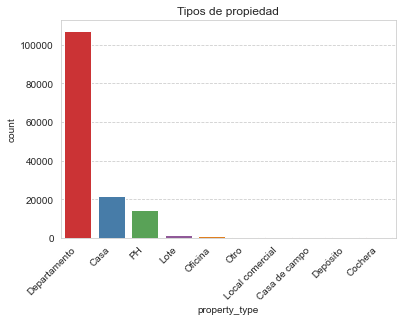

In [ ]:
### Grid Format ###
sns.set_style("whitegrid", {'grid.linestyle': '--'})

### Set the chart ###
chart = sns.countplot(x = 'property_type', data = data, order = data['property_type'].value_counts().index, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Tipos de propiedad')

### Show the chart ###
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

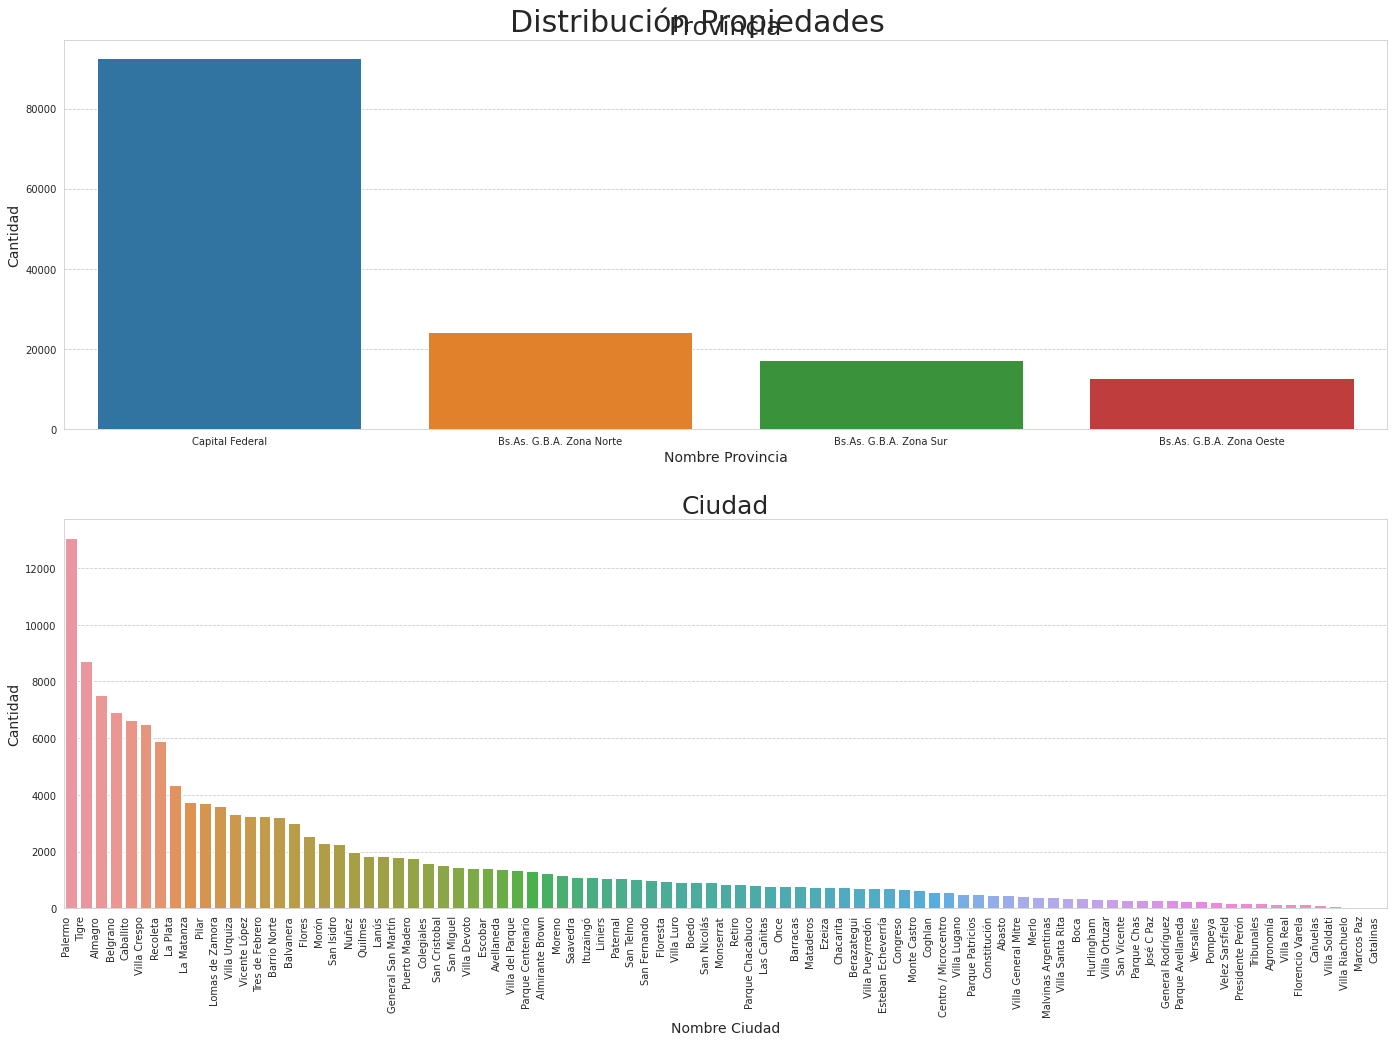

In [ ]:
### Grid Format ###
warnings.filterwarnings('ignore')

sns.set_style("whitegrid", {'grid.linestyle': '--'})

### Create Subplots ###
fig, ax = plt.subplots(2,1, figsize=(20,15))

### Subplot Title ###
fig.suptitle("Distribución Propiedades", fontsize=30)

### Set the first plot ###
ax1 = sns.countplot(data['l2'], ax=ax[0], order = data['l2'].value_counts().index)
ax1.set_xlabel('Nombre Provincia', fontsize=14)
ax1.set_ylabel('Cantidad', fontsize=14)
ax1.set_title('Provincia', fontsize=25)

### Set the second plot ###
ax2 = sns.countplot(data['l3'], ax=ax[1], order = data['l3'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, horizontalalignment='right')
ax2.set_xlabel('Nombre Ciudad', fontsize=14)
ax2.set_ylabel('Cantidad', fontsize=14)
ax2.set_title('Ciudad', fontsize=25)

### Tight layout & show the subplot ###
fig.tight_layout(pad=3.0)
plt.show()

In [14]:
### Set the Keys for Google Maps queries ###
API_KEY = 'THE APY KEY - PLEASE PUT YOUR OWN KEY'
gm = googlemaps.Client(key=API_KEY)
gmaps.configure(api_key=API_KEY)


### Import the data with the required info for the heatmap ###
fields = ['lat', 'lon','l1', 'l2', 'l3']
#loc_map = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv', usecols = fields)
loc_map = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Acamica/Sprint 1/Entregable/DS_Proyecto_01_Datos_Properati.csv', usecols = fields)
loc_map.insert(5, "val", '1')
loc_map.dropna(inplace=True)

locations = loc_map[['lat', 'lon']]          
val = loc_map['val']                         

### do geocode for the whole mega city ###
geocode_result = gm.geocode('Buenos Aires')[0]

### get the center of the city ###
center_lat=geocode_result['geometry']['location']['lat']
center_lng=geocode_result['geometry']['location']['lng']

### create the function to paint the coordinates in the map ###
def drawHeatMap(location, val, zoom, intensity, radius):
    ### setting the data and parameters ###
    heatmap_layer = gmaps.heatmap_layer(locations, val, dissipating = True)
    heatmap_layer.max_intensity = intensity
    heatmap_layer.point_radius = radius
    ### draw the heatmap into a figure ###
    fig = gmaps.figure()
    fig = gmaps.figure(center = [center_lat,center_lng], zoom_level=zoom)
    fig.add_layer(heatmap_layer)
    return fig
### set up parameters ###
zoom=10
intensity=5
radius=15

### call the function to draw the heatmap ###
drawHeatMap(locations, val, zoom, intensity, radius)

Figure(layout=FigureLayout(height='420px'))

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
warnings.filterwarnings('ignore')

data_copy = pd.DataFrame(data.copy())
#data_copy.dropna(inplace=True)

properties = ['Departamento', 'Casa', 'PH']
data2 = data_copy[data_copy['l2'] == 'Capital Federal']
data2 = data2[data.property_type.isin(properties)]
data2.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Text(0.5, 0, 'Precio')

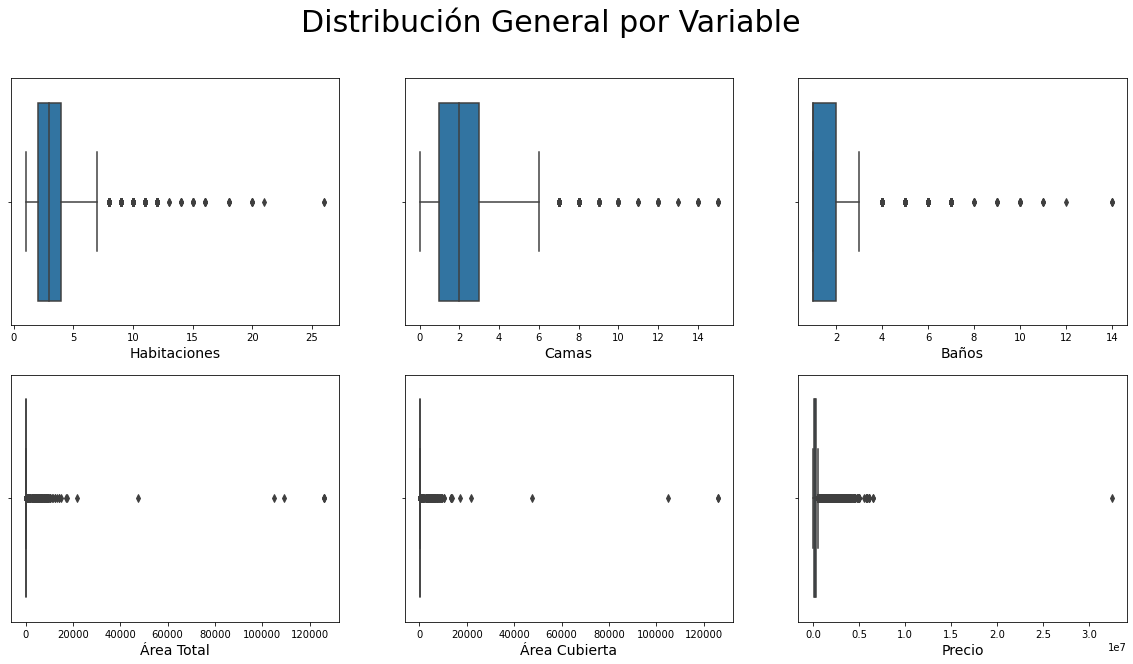

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
warnings.filterwarnings('ignore')

plt.figure(figsize = (20,10))
plt.suptitle("Distribución General por Variable", fontsize=30)

plt.subplot(2,3,1)
sns.boxplot(data2.rooms)
plt.xlabel("Habitaciones", fontsize=14)

plt.subplot(2,3,2)
sns.boxplot(data2.bedrooms)
plt.xlabel("Camas", fontsize=14)

plt.subplot(2,3,3)
sns.boxplot(data2.bathrooms)
plt.xlabel("Baños", fontsize=14)

plt.subplot(2,3,4)
sns.boxplot(data2.surface_total)
plt.xlabel("Área Total", fontsize=14)

plt.subplot(2,3,5)
sns.boxplot(data2.surface_covered)
plt.xlabel("Área Cubierta", fontsize=14)

plt.subplot(2,3,6)
sns.boxplot(data2.price)
plt.xlabel("Precio", fontsize=14)

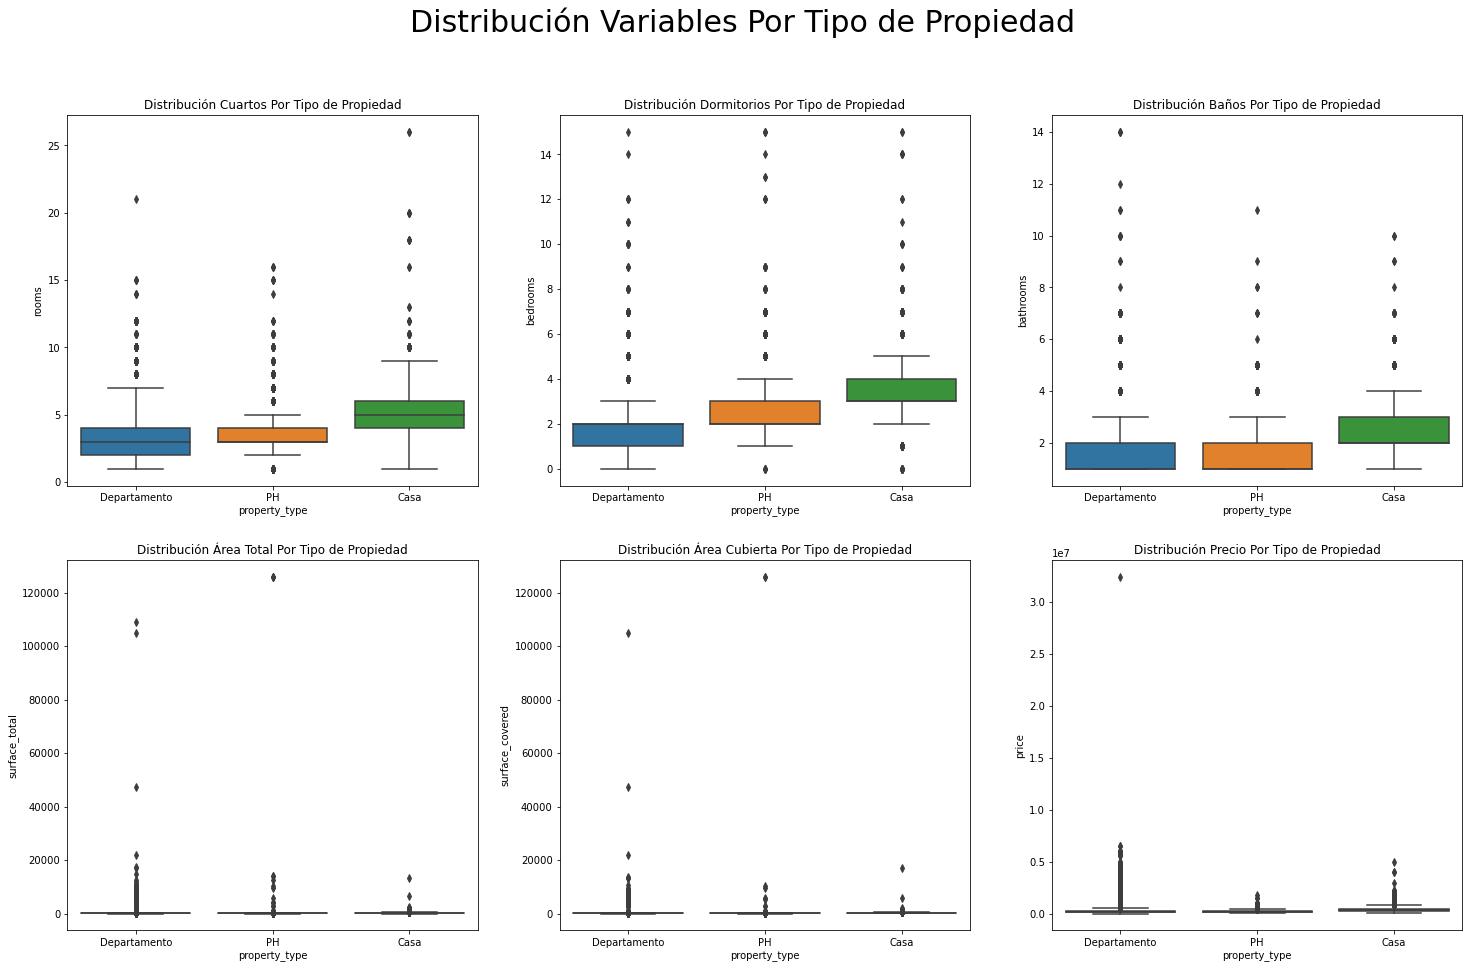

In [ ]:
plt.figure(figsize = (25,15))
plt.suptitle("Distribución Variables Por Tipo de Propiedad", fontsize=30)

plt.subplot(2,3,1)
sns.boxplot(data = data2, x = 'property_type', y = "rooms")
plt.title('Distribución Cuartos Por Tipo de Propiedad')

plt.subplot(2,3,2)
sns.boxplot(data = data2, x = 'property_type', y = "bedrooms")
plt.title('Distribución Dormitorios Por Tipo de Propiedad')

plt.subplot(2,3,3)
sns.boxplot(data = data2, x = 'property_type', y = "bathrooms")
plt.title('Distribución Baños Por Tipo de Propiedad')

plt.subplot(2,3,4)
sns.boxplot(data = data2, x = 'property_type', y = "surface_total")
plt.title('Distribución Área Total Por Tipo de Propiedad')

plt.subplot(2,3,5)
sns.boxplot(data = data2, x = 'property_type', y = "surface_covered")
plt.title('Distribución Área Cubierta Por Tipo de Propiedad')

plt.subplot(2,3,6)
sns.boxplot(data = data2, x = 'property_type', y = "price")
plt.title('Distribución Precio Por Tipo de Propiedad')
plt.show()

In [ ]:
data_departamento = data2.loc[data2['property_type'] == 'Departamento', ['lat', 'lon', 'price']]
data_ph = data2.loc[data2['property_type'] == 'PH', ['lat', 'lon', 'price']]
data_casa = data2.loc[data2['property_type'] == 'Casa', ['lat', 'lon', 'price']]

In [ ]:
data_dep_rooms = data2.loc[data2['property_type'] == 'Departamento', ['rooms', 'bedrooms', 'bathrooms','price']]
data_ph_rooms = data2.loc[data2['property_type'] == 'PH', ['rooms', 'bedrooms', 'bathrooms','price']]
data_casa_rooms = data2.loc[data2['property_type'] == 'Casa', ['rooms', 'bedrooms', 'bathrooms','price']]

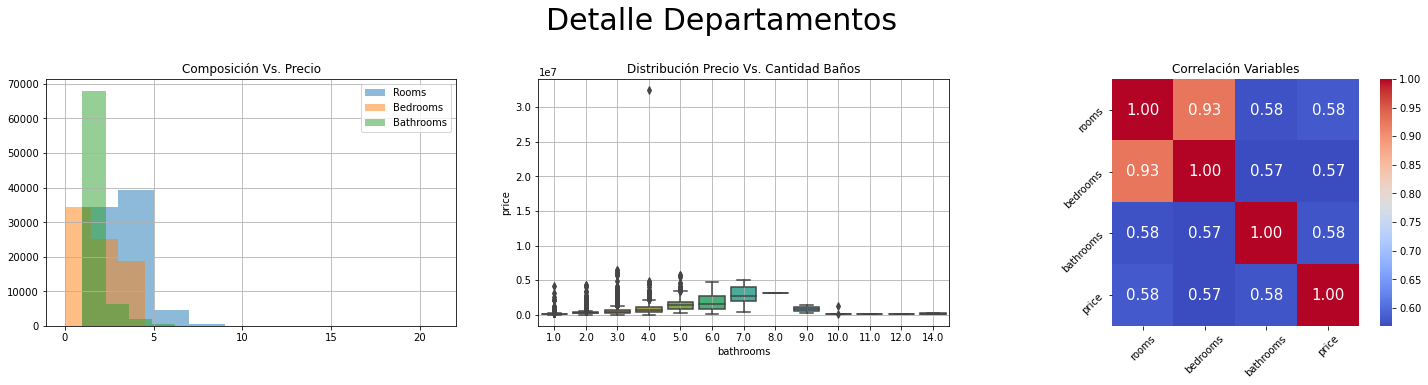

In [ ]:
plt.figure(figsize = (25,10))
plt.suptitle("Detalle Departamentos", fontsize=30)

plt.subplot(2,3,1)
plt.hist(data_dep_rooms['rooms'], bins = 10, alpha = 0.5, label = 'Rooms')
plt.hist(data_dep_rooms['bedrooms'], bins = 10, alpha = 0.5, label = 'Bedrooms')
plt.hist(data_dep_rooms['bathrooms'], bins = 10, alpha = 0.5, label = 'Bathrooms')
plt.grid()
plt.title('Composición Vs. Precio')
plt.legend()


plt.subplot(2,3,2)
sns.boxplot(data = data_dep_rooms, x = 'bathrooms', y = "price")
plt.grid()
plt.title('Distribución Precio Vs. Cantidad Baños')
#plt.show()

plt.subplot(2,3,3)
#plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación Variables')
plt.show()

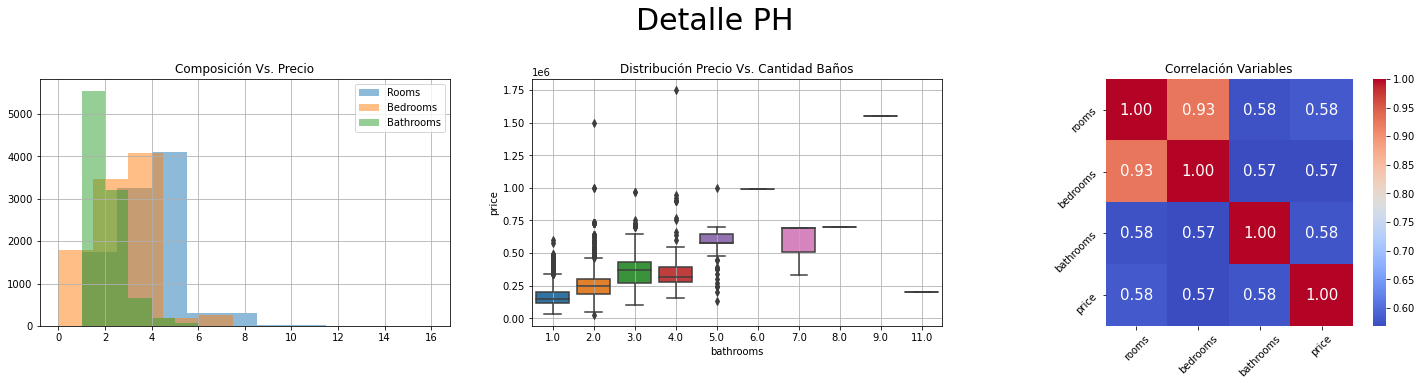

In [ ]:
plt.figure(figsize = (25,10))
plt.suptitle("Detalle PH", fontsize=30)

plt.subplot(2,3,1)
plt.hist(data_ph_rooms['rooms'], bins = 10, alpha = 0.5, label = 'Rooms')
plt.hist(data_ph_rooms['bedrooms'], bins = 10, alpha = 0.5, label = 'Bedrooms')
plt.hist(data_ph_rooms['bathrooms'], bins = 10, alpha = 0.5, label = 'Bathrooms')
plt.grid()
plt.title('Composición Vs. Precio')
plt.legend()

plt.subplot(2,3,2)
sns.boxplot(data = data_ph_rooms, x = 'bathrooms', y = "price")
plt.grid()
plt.title('Distribución Precio Vs. Cantidad Baños')
#plt.show()

plt.subplot(2,3,3)
corr = data_ph_rooms.corr()
#plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación Variables')
plt.show()

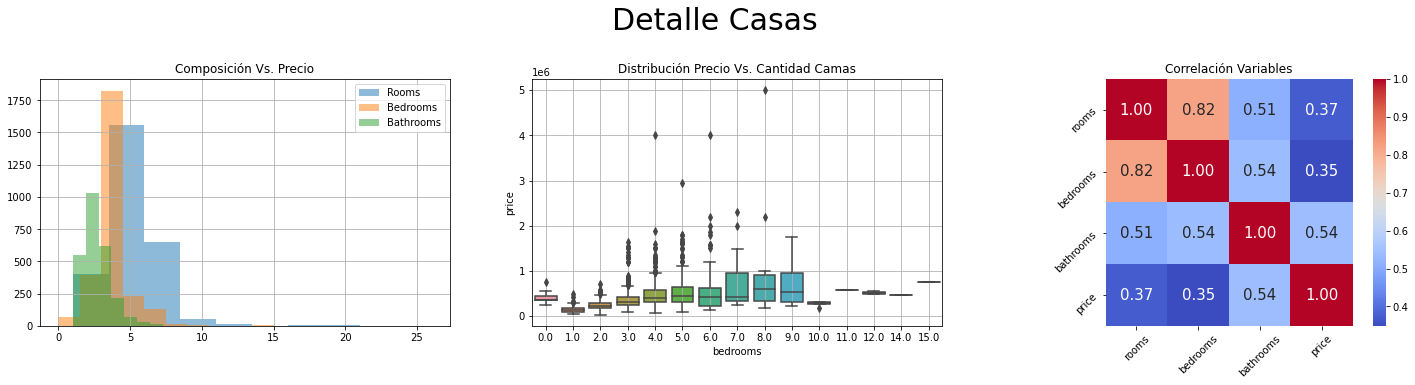

In [ ]:
plt.figure(figsize = (25,10))
plt.suptitle("Detalle Casas", fontsize=30)

plt.subplot(2,3,1)
plt.hist(data_casa_rooms['rooms'], bins = 10, alpha = 0.5, label = 'Rooms')
plt.hist(data_casa_rooms['bedrooms'], bins = 10, alpha = 0.5, label = 'Bedrooms')
plt.hist(data_casa_rooms['bathrooms'], bins = 10, alpha = 0.5, label = 'Bathrooms')
plt.grid()
plt.title('Composición Vs. Precio')
plt.legend()

plt.subplot(2,3,2)
sns.boxplot(data = data_casa_rooms, x = 'bedrooms', y = "price")
plt.grid()
plt.title('Distribución Precio Vs. Cantidad Camas')
#plt.show()

plt.subplot(2,3,3)
corr = data_casa_rooms.corr()
#plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación Variables')
plt.show()

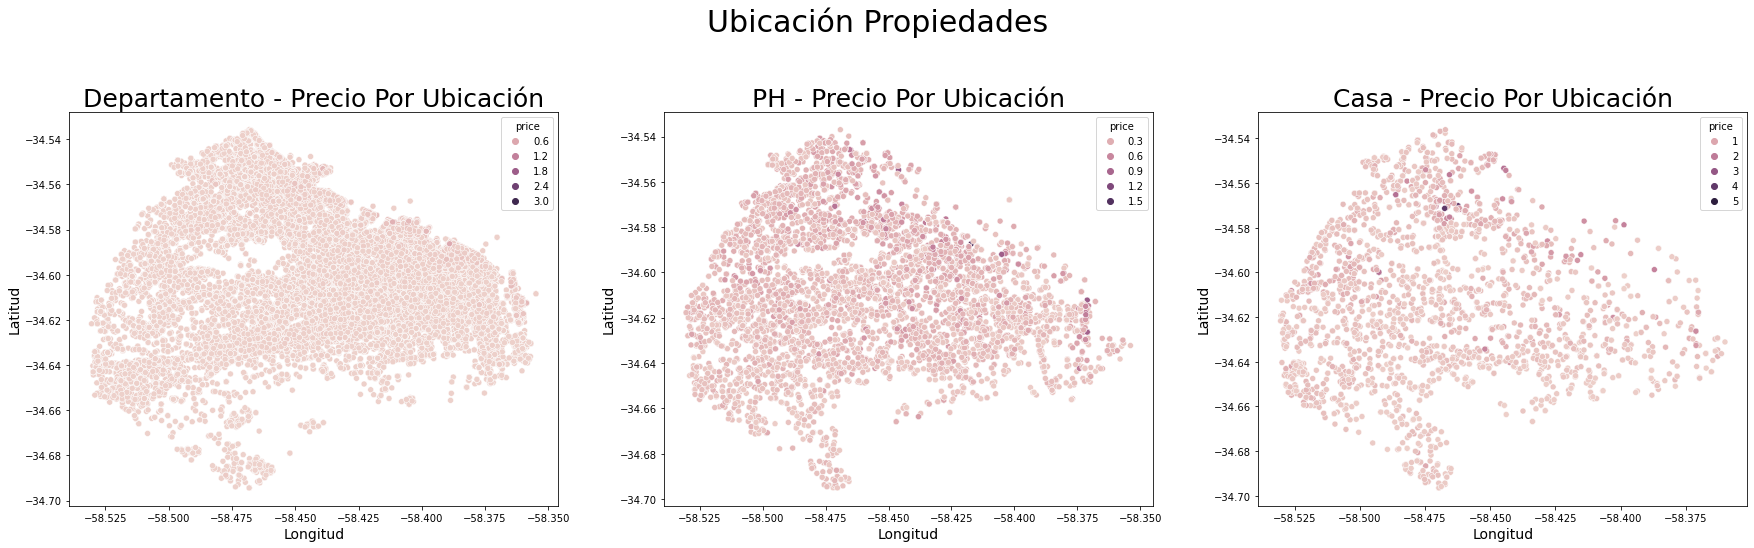

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
fig.suptitle("Ubicación Propiedades", fontsize=30)

ax1 = sns.scatterplot(x="lon", y="lat", hue="price" , data=data_departamento, ax=ax1)
ax1.set_xlabel('Longitud', fontsize=14)
ax1.set_ylabel('Latitud', fontsize=14)
ax1.set_title('Departamento - Precio Por Ubicación', fontsize=25)

ax2 = sns.scatterplot(x="lon", y="lat", hue="price" , data=data_ph, ax=ax2)
ax2.set_xlabel('Longitud', fontsize=14)
ax2.set_ylabel('Latitud', fontsize=14)
ax2.set_title('PH - Precio Por Ubicación', fontsize=25)

ax3 = sns.scatterplot(x="lon", y="lat", hue="price" , data=data_casa, ax=ax3)
ax3.set_xlabel('Longitud', fontsize=14)
ax3.set_ylabel('Latitud', fontsize=14)
ax3.set_title('Casa - Precio Por Ubicación', fontsize=25)

plt.tight_layout(pad=3.0)
plt.show()

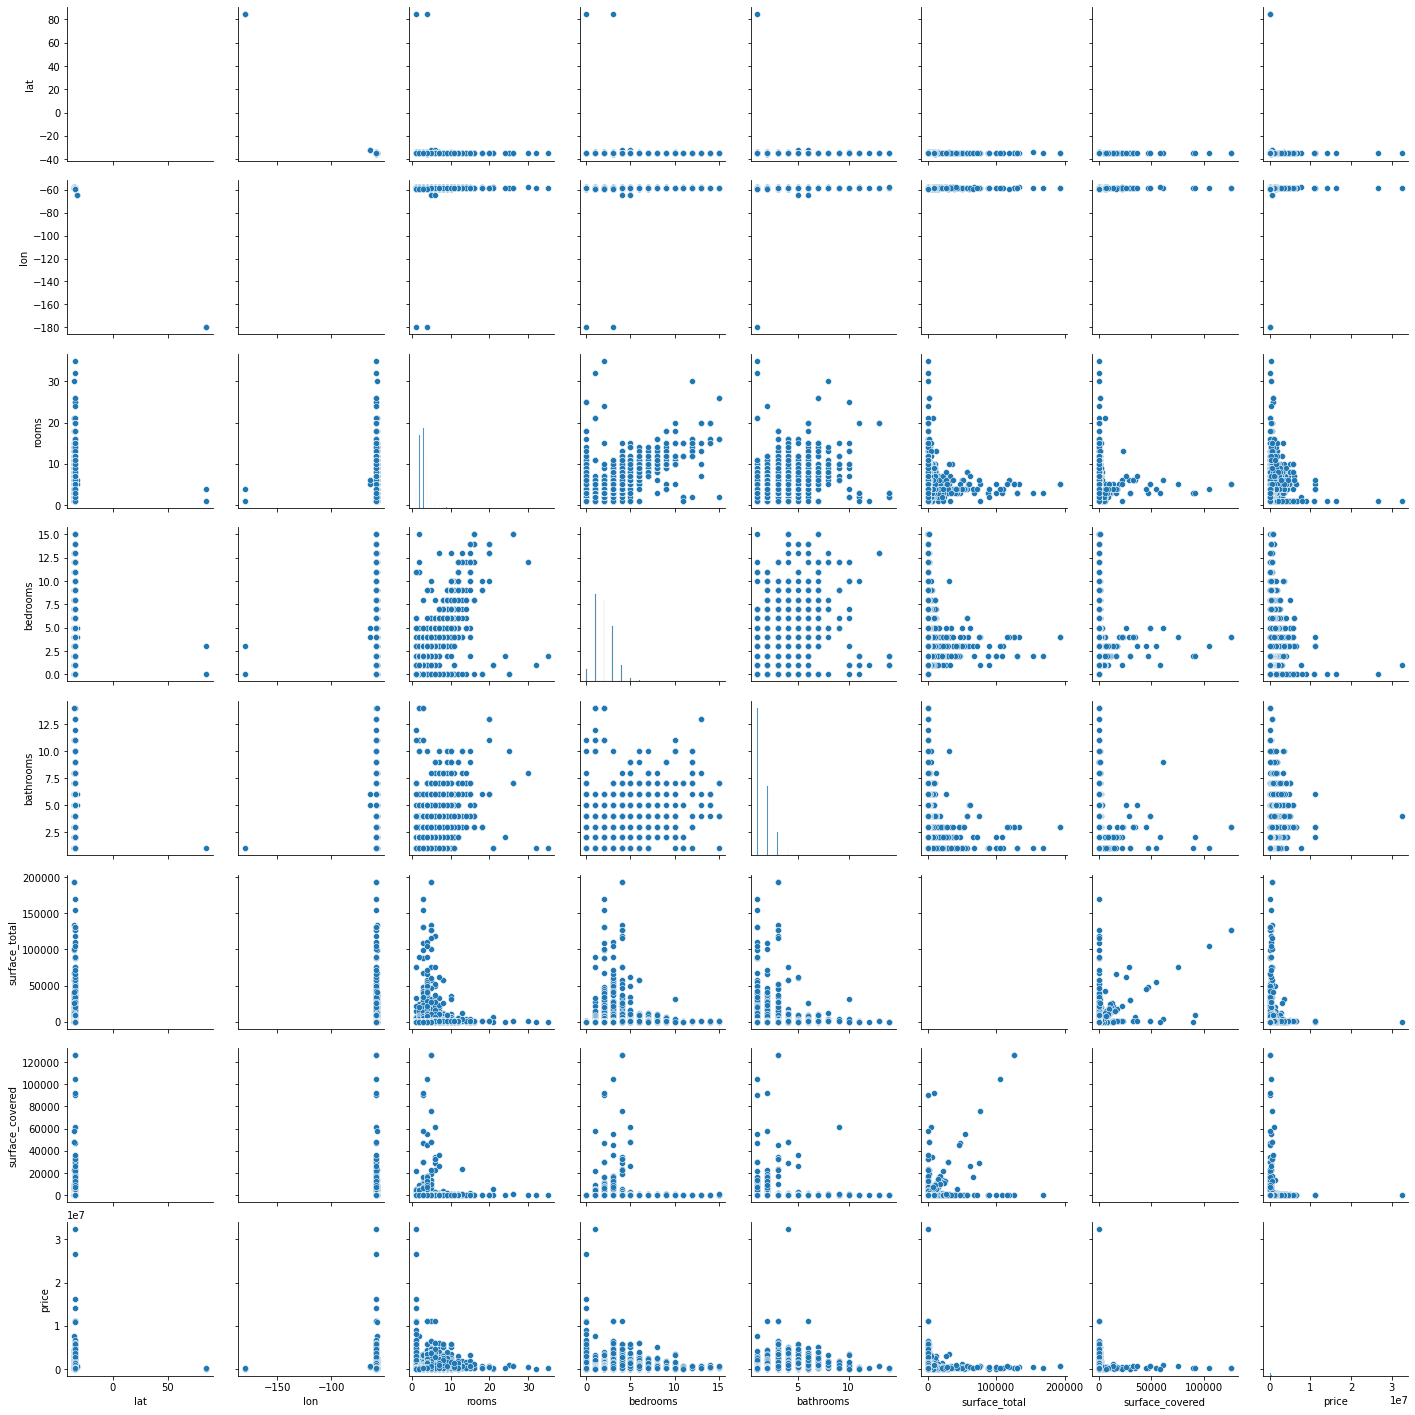

In [ ]:
sns.pairplot(data)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

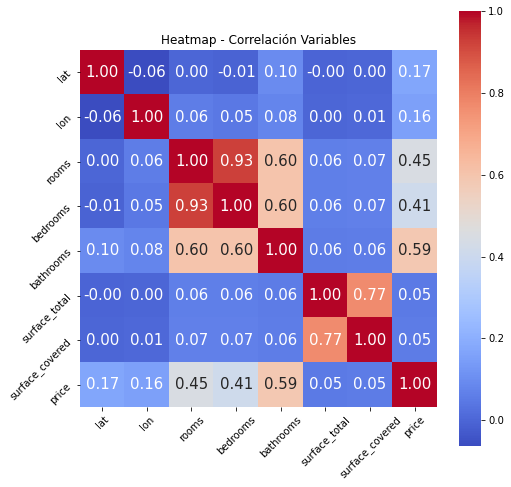

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
corr = data2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Heatmap - Correlación Variables')
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### Respuesta DAG:

Si tomamos un promedio simple sobre los valores totales, tendríamos el top 5 de los barrios con un promedio mayor:

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data_price_barrio = pd.DataFrame(round(data2.groupby('l3')['price'].mean(),2))
data3 = data_price_barrio.sort_values(by=['price'], ascending=False)
data3.head()

price
l3                      
Puerto Madero  985202.21
Las Cañitas    469488.15
Recoleta       410003.82
Belgrano       377029.86
Palermo        354744.48

Ahora, si sumamos el precio total de cada barrio, y lo dividimos por la totalidad de metros cuadrados, tendremos el valor promedio del metro cuadrado, que es un valor más cercano para determinar el barrio más costoso:

In [ ]:
data_price_barrio_agv_m2 = data_price_barrio_m2.groupby(['l3']).agg({'price':'sum','surface_total':'sum'})
data_price_barrio_agv_m2['precio_m2_by_barrio'] = data_price_barrio_agv_m2['price'] / data_price_barrio_agv_m2['surface_total']
data_final_m2 = data_price_barrio_agv_m2.sort_values(by=['precio_m2_by_barrio'], ascending=False)

data_final_m2.head()

price  surface_total  precio_m2_by_barrio
l3                                                             
Puerto Madero  1.720163e+09       275528.0          6243.151542
Las Cañitas    3.699567e+08        82430.0          4488.131336
Palermo        4.614162e+09      1260258.0          3661.283255
Recoleta       2.406312e+09       711108.0          3383.891682
Belgrano       2.592457e+09       774703.0          3346.388669

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [15]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
new_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Acamica/Sprint 1/Entregable/DS_Proyecto_01_Datos_Properati.csv')

In [16]:
### 1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa ###
properties = ['Departamento', 'Casa', 'PH']
data = new_data[new_data['l2'] == 'Capital Federal']
data2 = data[data.property_type.isin(properties)]

### 2. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2. ###
### 3. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares. ###
mascara = np.logical_and(((data2.surface_total <= 1000) & (data2.surface_total >= 15)), (data2.price <= 4000000))

data3 = data2[mascara]

### 4. Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price. ###
data4 = data3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

### 5. Descarta aquellas instacias con valores faltantes. ###
data5 = data4[(data4['bathrooms'].notna())]
data6 = data5[(data5['surface_covered'].notna())]

data6.dropna()

data_ml = data6
data_ml.shape

(81019, 6)

In [17]:
data_ml.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price
0    7.0       7.0        2.0          140.0            140.0  153000.0
1    2.0       1.0        2.0           70.0             58.0  159000.0
2    2.0       1.0        1.0           45.0             45.0  125000.0
3    2.0       1.0        1.0           85.0             50.0  295000.0
5    2.0       1.0        1.0           56.0             56.0  150000.0

In [18]:
data_ml.describe()

rooms      bedrooms  ...  surface_covered         price
count  81019.000000  81019.000000  ...     81019.000000  8.101900e+04
mean       3.009652      2.002037  ...        84.928535  2.637725e+05
std        1.308602      1.049673  ...       156.133119  2.989499e+05
min        1.000000      0.000000  ...         1.000000  6.000000e+03
25%        2.000000      1.000000  ...        44.000000  1.250000e+05
50%        3.000000      2.000000  ...        63.000000  1.800000e+05
75%        4.000000      3.000000  ...        96.000000  2.800000e+05
max       26.000000     15.000000  ...     17220.000000  4.000000e+06

[8 rows x 6 columns]

### Modelo Machine Learning

In [19]:
X = data_ml[['rooms', 'bedrooms', 'surface_total', 'surface_covered']]
y = data_ml[['price']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 4) (56713, 1) (24306, 4) (24306, 1)


In [21]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [22]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
print(linear_model.coef_, linear_model.intercept_)

[[ 14659.51632983 -34225.2292144    2671.76111157    135.85217444]] [22033.3290908]


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 215670.13121967154
Raíz del error cuadrático medio en Test: 218128.41042558264


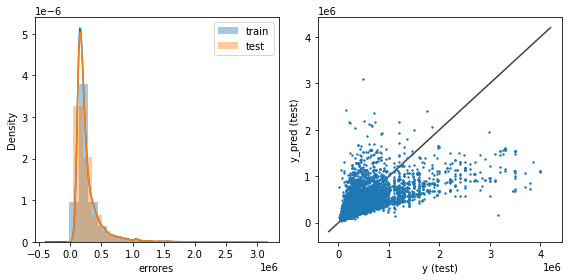

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 195101.95546891974
Raíz del error cuadrático medio en Test: 198084.45659411614


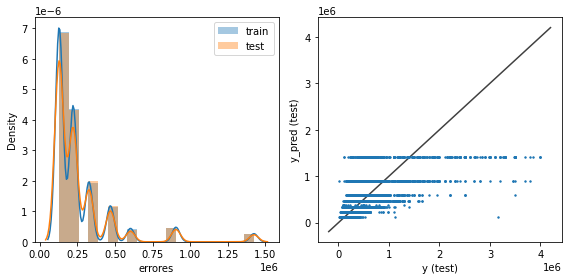

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 127996.47681251392
Raíz del error cuadrático medio en Test: 161079.67580503342


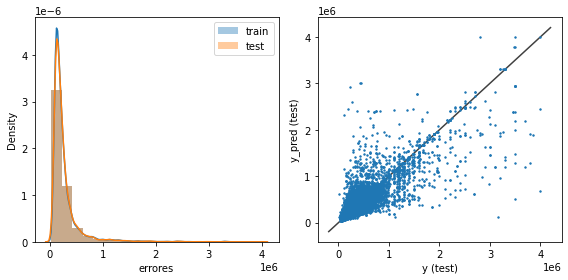

In [27]:
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

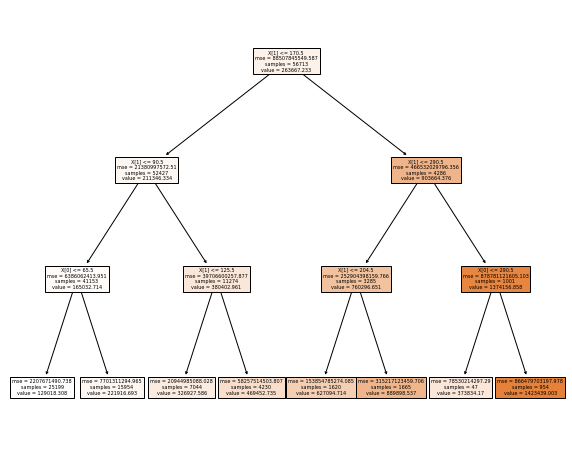

In [ ]:
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

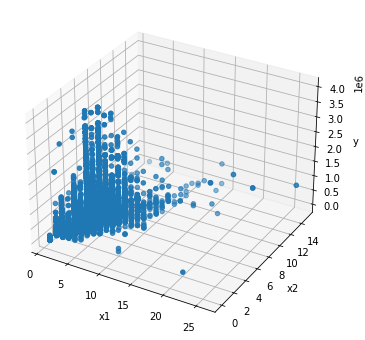

In [ ]:
X = data_ml[['rooms', 'bedrooms', 'surface_total', 'surface_covered']]
y = data_ml[['price']]


x1 = data_ml.rooms
x2 = data_ml.bedrooms
x3 = data_ml.surface_total
x4 = data_ml.surface_covered
y = data_ml.price


def plot_3d_scatter(x1, x2, x3, x4, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, x3, x4, y, ax=None, fig = None)